<a href="https://colab.research.google.com/github/atikhasan007/DeepLearning/blob/main/ModelValidation_with_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target

In [6]:
#k-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=1)


In [7]:
model_knn.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

In [8]:
from sklearn.metrics import accuracy_score
y_pred = model_knn.predict(x)
acc = accuracy_score(y,y_pred)
print(acc)

1.0


**model validation with right way**

In [11]:
from sklearn.model_selection import train_test_split

#split the data with 30% in each set
train_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for split_val in train_list:
  x1, x2, y1,y2 = train_test_split(x,y,test_size=split_val, random_state=42)

  model_knn.fit(x1,y1)

  y2_pred = model_knn.predict(x2)
  acc2 = accuracy_score(y2,y2_pred)


  print(split_val, acc2*100)





0.1 100.0
0.2 100.0
0.3 100.0
0.4 98.33333333333333
0.5 97.33333333333334
0.6 97.77777777777777
0.7 96.19047619047619
0.8 97.5
0.9 97.77777777777777


**cross-validation-এর core logic **

| ধাপ | কাজ                                  |
| --- | ------------------------------------ |
| 1️⃣ | প্রথম অংশে train, দ্বিতীয় অংশে test |
| 2️⃣ | দ্বিতীয় অংশে train, প্রথম অংশে test |
| 3️⃣ | দুই accuracy এর গড় → final accuracy |


In [15]:
y2_model = model_knn.fit(x1,y1).predict(x2)
y1_model = model_knn.fit(x2,y2).predict(x1)
accuracy_score(y1,y1_model), accuracy_score(y2,y2_model)


(0.9333333333333333, 0.9777777777777777)

কাজের ধাপ (ভেতরে কী ঘটে):

ডেটা কে ৫ ভাগে ভাগ করা হয় → Fold1, Fold2, Fold3, Fold4, Fold5

প্রতি বার ১টা fold হয় validation set, আর বাকি ৪টা fold হয় training set

Model ৫ বার ট্রেন–টেস্ট হয় (প্রতিবার আলাদা fold test হিসেবে)

প্রতিবারের accuracy পাওয়া যায় → যেমন [0.92, 0.90, 0.95, 0.91, 0.93]

সবগুলোর average accuracy নেয়া যায় → .mean()

সংক্ষেপে মনে রাখো:

💬 cross_val_score() স্বয়ংক্রিয়ভাবে train/test split করে
💬 cv=5 মানে ৫ বার validation
💬 ফলাফল = প্রতিটি fold-এর accuracy + তাদের গড়

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_knn,x,y,cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_knn,x,y,cv=5).mean()

np.float64(0.96)

| ধাপ | কী কাজ হচ্ছে                                                                       |
| --- | ---------------------------------------------------------------------------------- |
| 1️⃣ | `LeaveOneOut()` মানে প্রতিবার **একটা ডেটা পয়েন্ট** বাদ দিয়ে model train হবে।      |
| 2️⃣ | অর্থাৎ প্রতিবার model train হয় **n−1 samples** দিয়ে, আর test হয় **1 sample** দিয়ে। |
| 3️⃣ | এটা dataset-এর প্রতিটি sample-এর জন্য একবার করে করা হয়।                            |
| 4️⃣ | শেষে প্রতিবারের accuracy (বা স্কোর) `scores` এ সংরক্ষিত হয়।                        |


সুবিধা:

সমস্ত ডেটা model training এ ব্যবহার হয়।

খুব accurate estimate দেয় (especially ছোট dataset এর জন্য ভালো)।

অসুবিধা:

ডেটা বেশি হলে computationally heavy (যেমন 10,000 sample → 10,000 বার train করতে হবে 😅)

In [18]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(model_knn,x,y,cv=loo)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
scores.mean()

np.float64(0.96)

**Polynomial Regression model**

| লাইন                                                   | কাজ                                                                                         |
| ------------------------------------------------------ | ------------------------------------------------------------------------------------------- |
| `from sklearn.preprocessing import PolynomialFeatures` | ইনপুট ফিচার থেকে ( x, x^2, x^3 ) ইত্যাদি নতুন ফিচার তৈরি করে (nonlinear relation ধরার জন্য) |
| `from sklearn.linear_model import LinearRegression`    | সাধারণ লিনিয়ার রিগ্রেশন মডেল, যেটা ( y = a + bx ) আকারের সম্পর্ক শেখে                      |
| `from sklearn.pipeline import make_pipeline`           | একাধিক ধাপ (যেমন feature transform + model train) একসাথে combine করে “pipeline” বানায়      |


এই function আসলে একটা shortcut,
যা একসাথে দুটো কাজ করে দেয়:

ইনপুট data থেকে polynomial feature বানায়

সেই feature-এর ওপর linear regression ফিট kore

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))


#without make_pipline
# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X)
# model = LinearRegression()
# model.fit(X_poly, y)


**synthetic (artificial) dataset**

| Parameter | কাজ                                                              |
| --------- | ---------------------------------------------------------------- |
| `N`       | কতগুলো sample (data point) বানাতে চাও                            |
| `err`     | noise বা random error যোগ করার পরিমাণ                            |
| `rseed`   | random number generator এর seed (যাতে একই ফলাফল reproducible হয়) |


In [24]:
import numpy as np

def make_data(N, err=1.0 , rseed=1):
  #randomly sample the data
  rng = np.random.RandomState(rseed) #random generator object তৈরি করে,
  x = rng.rand(N,1) ** 2 #** 2 দেওয়ার ফলে values ছোট range-এ compressed হয় (curve-এর জন্য উপযোগী)।
  y = 10 - 1. / (x.ravel() + 0.1)#x.ravel() মানে x কে 1D array বানানো, কারণ x.shape = (N, 1)
  if err > 0:
    y+=err*rng.randn(N)
  return x, y

x,y = make_data(40)

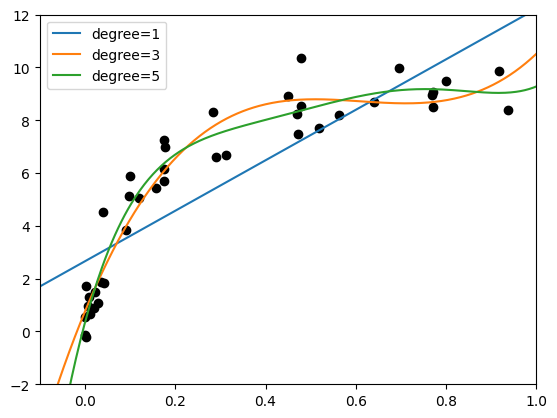

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt


x_test = np.linspace(-0.1,1.1,500)[:,None]

plt.scatter(x.ravel(),y,color='black')
axis = plt.axis()
for degree in [1,3,5]:
  y_test = PolynomialRegression(degree).fit(x,y).predict(x_test)
  plt.plot(x_test.ravel(),y_test,label='degree={0}'.format(degree))
  plt.xlim(-0.1,1.0)
  plt.ylim(-2,12)
  plt.legend(loc='best')

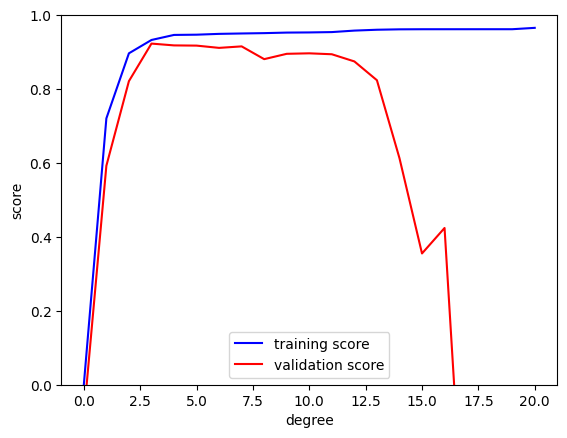

In [27]:
from sklearn.model_selection import validation_curve
degree = np.arange(0,21)
train_score,val_score = validation_curve(
    PolynomialRegression(),x,y,
    param_name='polynomialfeatures__degree',
    param_range=degree,cv=7)



plt.plot(degree,np.median(train_score,1),
         color='blue',label='training score')
plt.plot(degree,np.median(val_score,1),
         color='red',label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')
plt.show()

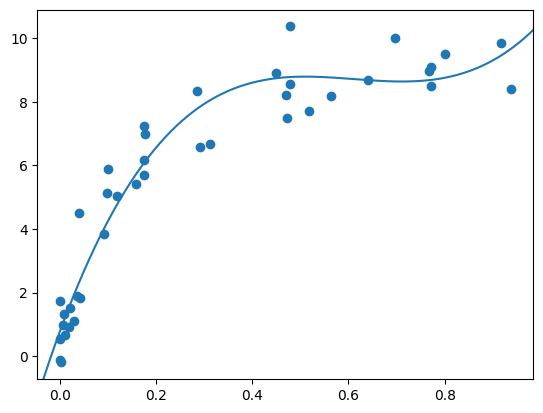

In [28]:
plt.scatter(x.ravel(),y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(x,y).predict(x_test)
plt.plot(x_test.ravel(),y_test)
plt.axis(lim)
plt.show()

**Learning Curves**

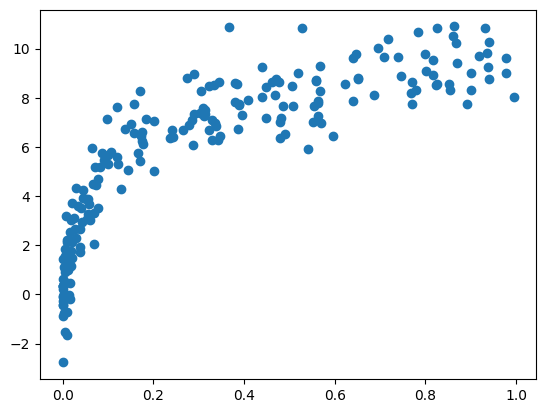

In [30]:
x2, y2 = make_data(200)
plt.scatter(x2.ravel(),y2)
plt.show()

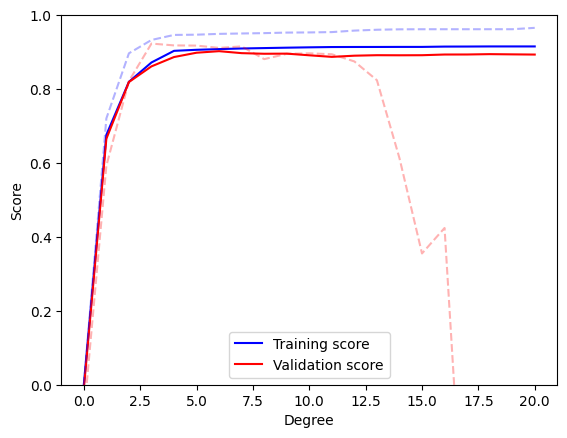

In [33]:
degree = np.arange(21)

train_score2, val_score2 = validation_curve(
    PolynomialRegression(), x2, y2,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=7
)

plt.plot(degree, np.median(train_score2, 1),
         color='blue', label='Training score')
plt.plot(degree, np.median(val_score2, 1),
         color='red', label='Validation score')

plt.plot(degree, np.median(train_score, 1),
         color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1),
         color='red', alpha=0.3, linestyle='dashed')

plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Degree')
plt.ylabel('Score')
plt.show()
